## Exponentially Weighted Moving Average

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv("./data/DailyDelhiClimateTest.csv")[["date", "meantemp"]]
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


<Axes: xlabel='date', ylabel='meantemp'>

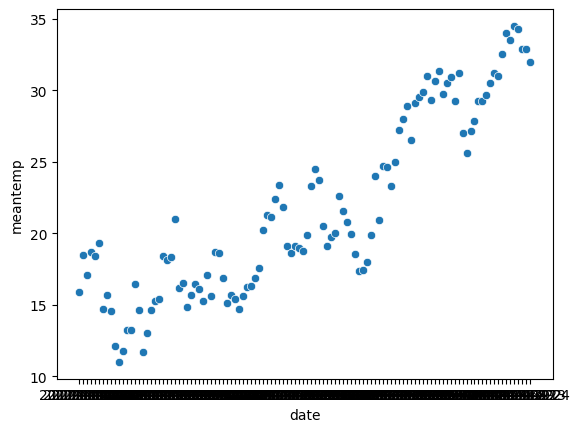

In [7]:
sns.scatterplot(x=df["date"], y=df["meantemp"])

### Manual Calculation

In [32]:
beta = 0.9
for i in range(len(df)):
    if i == 0:
        df.loc[i, "EWMA"] = df.loc[i, "meantemp"]
    else:
        df.loc[i, "EWMA"] = beta * df.loc[i-1, "EWMA"] + (1-beta) * df.loc[i, "meantemp"]

In [33]:
df

,date,meantemp,EWMA
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,16.171739
2,2017-01-03,17.111111,16.265676
3,2017-01-04,18.700000,16.509109
4,2017-01-05,18.388889,16.697087
...,...,...,...
109,2017-04-20,34.500000,30.640030
110,2017-04-21,34.250000,31.001027
111,2017-04-22,32.900000,31.190924
112,2017-04-23,32.875000,31.359332


<Axes: xlabel='date', ylabel='meantemp'>

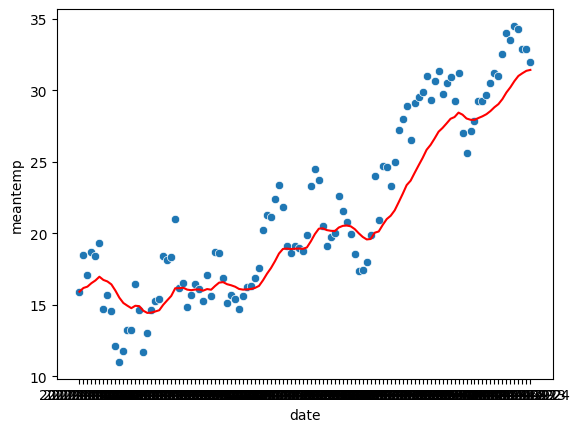

In [40]:
sns.scatterplot(data=df, x="date", y="meantemp")
sns.lineplot(data=df, x="date", y="EWMA", color="red")

### Using Pandas DataFrame built in function

In [ ]:
EWMA = df["meantemp"].ewm(alpha=0.1).mean()     # alpha = 1 - beta   |   .mean() is used to calculated the A for EWMA
EWMA

0      15.913043
1      17.274600
2      17.214272
3      17.646295
4      17.827632
         ...    
109    30.640166
110    31.001152
111    31.191039
112    31.359436
113    31.423493
Name: meantemp, Length: 114, dtype: float64

<Axes: xlabel='date', ylabel='meantemp'>

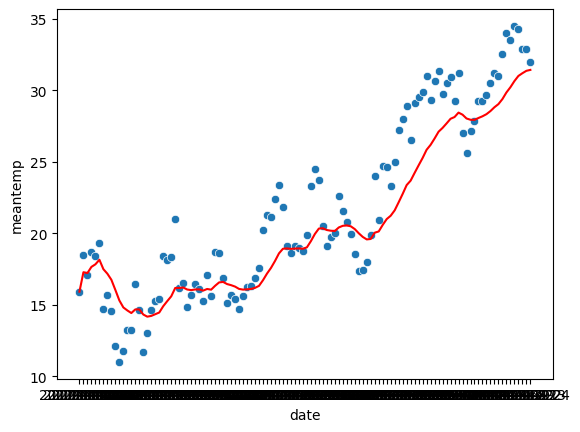

In [43]:
sns.scatterplot(data=df, x="date", y="meantemp")
sns.lineplot(x=df["date"], y=EWMA, color="red")